## Notebook for the calculation of soil characteristics around npp from soillgrids.

### Part 1:
#### The geo location of NPP from resource institute 

    The npp coordinates are reprojected the Molweide epsg 54009
    (Equal area projection)

In [1]:
#import pandas

#npp = pandas.read_csv('C:/Users/fabrams/Documents/KULEUVEN/Thesis Margot/Margot/globalpowerplantdatabasev120/global_power_plant_database.csv', delimiter = ',')
#npp = npp[(npp.primary_fuel=='Nuclear')]
#npp.to_csv('C:/Users/fabrams/Documents/KULEUVEN/Thesis Margot/Margot/globalpowerplantdatabasev120/npp.csv')

# further reprojected to Molweide 54009 in QGIS

In [6]:
import geopandas as gpd

npp = gpd.read_file('C:/Users/fabrams/Documents/KULEUVEN/Thesis Margot/Margot/globalpowerplantdatabasev120/npp_EPSG54009.gpkg')
npp = npp[['country','name', 'primary_fuel', 'capacity_mw','latitude','longitude','geometry']]

In [7]:
npp.iloc[0]

country                                                   ARG
name                                                 ATUCHA I
primary_fuel                                          Nuclear
capacity_mw                                               370
latitude                                              -33.967
longitude                                            -59.2059
geometry        POINT (-5283838.939929917 -4104537.853697687)
Name: 0, dtype: object

# Part 2
## Soil grids data

### Use API of soil grids to download parts of soilgrids map

In [53]:
#pip install soilgrids

In [8]:
import matplotlib.pyplot as plt
from soilgrids import SoilGrids

In [9]:
soil_grids = SoilGrids()
soil_grids.get_coverage_info(service_id='phh2o', coverage_id='phh2o_0-5cm_mean')

Supported CRS: 
urn:ogc:def:crs:EPSG::152160
urn:ogc:def:crs:EPSG::4326
urn:ogc:def:crs:EPSG::3857
urn:ogc:def:crs:EPSG::54009
urn:ogc:def:crs:EPSG::54012
urn:ogc:def:crs:EPSG::152160

Coverage Bounding Box: 
EPSG:4326
(-179.998360809347, -55.9773009202418, 179.994461880094, 82.7192840534453)
EPSG:152160
(-19949750.0, -6147500.0, 19861750.0, 8361000.0)



In [32]:
# Get coordinates from npp
x = npp.iloc[30]['geometry'].coords[0][0]
y = npp.iloc[30]['geometry'].coords[0][1]

#size of the box around the npp to download (pixel size 250 m)
size = 15000

variable_name: Soil pH in H2O
variable_units: pH*10
service_url: https://maps.isric.org/mapserv?map=/map/phh2o.map
service_id: phh2o
coverage_id: phh2o_0-5cm_mean
crs: urn:ogc:def:crs:EPSG::54009
bounding_box: (1681490.6785068912, 6897110.991756588, 1711490.6785068912, 6927110.991756588)
grid_resolution: (250.00000000001955, 249.99999999998434)


Text(0.5, 1.0, 'Mean pH between 0 and 5 cm soil depth')

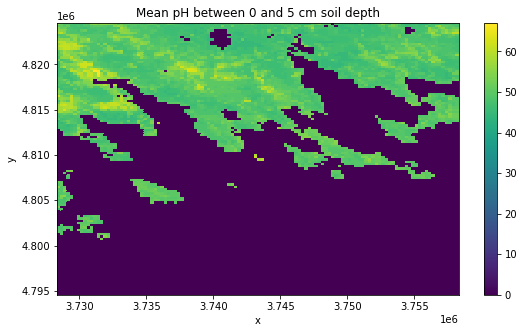

In [33]:
# get data from SoilGrids

data = soil_grids.get_coverage_data(service_id='phh2o', coverage_id='phh2o_0-5cm_mean',
                                       west= x - size, south= y - size, east= x + size, north=y + size,
                                       crs='urn:ogc:def:crs:EPSG::54009', output='test.tif')

# show metadata
for key, value in soil_grids.metadata.items():
    print('{}: {}'.format(key,value))

# plot data
data.plot(figsize=(9,5))
plt.title('Mean pH between 0 and 5 cm soil depth')

In [20]:
import rasterio 
data = rasterio.open('C:/Users/fabrams/Documents/KULEUVEN/SpatialDB/Scripts/test.tif')

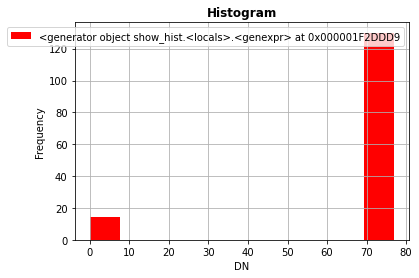

In [21]:
import rasterio.plot
rasterio.plot.show_hist(data)

In [22]:
soil = data.read(1)
pixel_nr = int((size/250))

for i in range(pixel_nr):
    soil[0,i] = 0

In [23]:

rows = list(range(((pixel_nr*2))))
del rows[pixel_nr]
del rows[pixel_nr-1]

columns = list(range(((pixel_nr*2))))


In [24]:
import numpy as np


x= np.array([list([1]*(pixel_nr*2))]*(pixel_nr*2))
for i in rows:
    columns = list(range(((pixel_nr*2))))
    if i < pixel_nr -1:      
        for times in list(range(i+1)):
            del columns[pixel_nr-times]
            del columns[pixel_nr - 1-times]

        
        for j in columns:
            x[i][j] = -999

    elif i > pixel_nr:
        for times in list(range(pixel_nr*2 - i )):
            del columns[pixel_nr-times]
            del columns[pixel_nr - 1-times]
        for j in columns:
            x[i][j] = -999

            
print(x)

[[-999 -999 -999 -999 -999    1    1 -999 -999 -999 -999 -999]
 [-999 -999 -999 -999    1    1    1    1 -999 -999 -999 -999]
 [-999 -999 -999    1    1    1    1    1    1 -999 -999 -999]
 [-999 -999    1    1    1    1    1    1    1    1 -999 -999]
 [-999    1    1    1    1    1    1    1    1    1    1 -999]
 [   1    1    1    1    1    1    1    1    1    1    1    1]
 [   1    1    1    1    1    1    1    1    1    1    1    1]
 [-999    1    1    1    1    1    1    1    1    1    1 -999]
 [-999 -999    1    1    1    1    1    1    1    1 -999 -999]
 [-999 -999 -999    1    1    1    1    1    1 -999 -999 -999]
 [-999 -999 -999 -999    1    1    1    1 -999 -999 -999 -999]
 [-999 -999 -999 -999 -999    1    1 -999 -999 -999 -999 -999]]


In [25]:
soil

array([[ 0,  0,  0,  0,  0,  0, 76, 76, 76, 76, 76, 76],
       [77, 77, 77, 77, 77, 77, 77, 76, 76, 76, 75, 75],
       [77, 77, 77, 77, 77, 77, 77, 77, 76, 76, 75, 75],
       [77, 77, 77, 77, 77, 76, 77, 77, 77, 76, 76, 75],
       [ 0, 77, 77, 77, 77,  0,  0, 77, 77, 76, 75, 76],
       [ 0,  0,  0, 77, 77,  0,  0,  0, 76, 76, 75, 76],
       [77,  0,  0, 77, 77,  0,  0,  0, 76, 76, 76, 76],
       [77, 77, 77, 76, 76, 76, 76, 76, 76, 76, 76, 76],
       [76, 76, 76, 76, 76, 76, 76, 75, 76, 76, 76, 76],
       [76, 76, 76, 76, 76, 76, 76, 75, 76, 76, 76, 76],
       [75, 76, 76, 76, 76, 76, 76, 75, 75, 75, 75, 76],
       [76, 75, 76, 76, 76, 76, 76, 76, 75, 75, 75, 76]], dtype=int16)

In [26]:
test = (soil+1) * x -1
test[test<0] = -1
print(test)
unique, counts = np.unique(test, return_counts=True)
dictionary = dict(zip(unique, counts))

dictionary

[[-1 -1 -1 -1 -1  0 76 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 77 77 77 76 -1 -1 -1 -1]
 [-1 -1 -1 77 77 77 77 77 76 -1 -1 -1]
 [-1 -1 77 77 77 76 77 77 77 76 -1 -1]
 [-1 77 77 77 77  0  0 77 77 76 75 -1]
 [ 0  0  0 77 77  0  0  0 76 76 75 76]
 [77  0  0 77 77  0  0  0 76 76 76 76]
 [-1 77 77 76 76 76 76 76 76 76 76 -1]
 [-1 -1 76 76 76 76 76 75 76 76 -1 -1]
 [-1 -1 -1 76 76 76 76 75 76 -1 -1 -1]
 [-1 -1 -1 -1 76 76 76 75 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 76 76 -1 -1 -1 -1 -1]]


{-1: 60, 0: 14, 75: 5, 76: 38, 77: 27}

In [27]:
#initiate counter
from collections import Counter
c = Counter()

In [28]:
c.update(dictionary)

In [29]:
print(c)

Counter({-1: 60, 76: 38, 77: 27, 0: 14, 75: 5})


In [115]:
range(len(npp))[:10]

range(0, 10)

# Fully automated

In [ ]:
import geopandas as gpd
#initiate counter

from collections import Counter
c = Counter()

npp = gpd.read_file('C:/Users/fabrams/Documents/KULEUVEN/Thesis Margot/Margot/globalpowerplantdatabasev120/npp_EPSG54009.gpkg')
npp = npp[['country','name', 'primary_fuel', 'capacity_mw','latitude','longitude','geometry']]

all_npp = range(len(npp))

for i in all_npp:
    # Get coordinates from npp
    x = npp.iloc[i]['geometry'].coords[0][0]
    y = npp.iloc[i]['geometry'].coords[0][1]

    #size of the box around the npp to download (pixel size 250 m)
    size = 1000

    data = soil_grids.get_coverage_data(service_id='phh2o', coverage_id='phh2o_0-5cm_mean',
                                           west= x - size, south= y - size, east= x + size, north=y + size,
                                           crs='urn:ogc:def:crs:EPSG::54009', output='test.tif')
    import rasterio 
    data = rasterio.open('C:/Users/fabrams/Documents/KULEUVEN/SpatialDB/Scripts/test.tif')

    soil = data.read(1)
    pixel_nr = int((size/250))

    for i in range(pixel_nr):
        soil[0,i] = 0


    rows = list(range(((pixel_nr*2))))
    del rows[pixel_nr]
    del rows[pixel_nr-1]

    columns = list(range(((pixel_nr*2))))

    import numpy as np


    x= np.array([list([1]*(pixel_nr*2))]*(pixel_nr*2))
    for i in rows:
        columns = list(range(((pixel_nr*2))))
        if i < pixel_nr -1:      
            for times in list(range(i+1)):
                del columns[pixel_nr-times]
                del columns[pixel_nr - 1-times]


            for j in columns:
                x[i][j] = -999

        elif i > pixel_nr:
            for times in list(range(pixel_nr*2 - i )):
                del columns[pixel_nr-times]
                del columns[pixel_nr - 1-times]
            for j in columns:
                x[i][j] = -999

    test = (soil+1) * x -1
    test[test<0] = -1

    unique, counts = np.unique(test, return_counts=True)
    dictionary = dict(zip(unique, counts))

    c.update(dictionary)

print(c)

## Extra

In [ ]:
import re
latitude = []
longitude = []
for i in npp.itertuples():
    latitude.append(re.sub("[.]", ",", i.latitude))
    longitude.append(re.sub("[.]", ",", i.longitude))
    
npp['latitude'] = latitude
npp['longitude'] = longitude

In [ ]:
latitude = []
longitude = []
for i in npp.itertuples():
    latitude.append(float(i.latitude))
    longitude.append(float(i.longitude))
    
npp['latitude'] = latitude
npp['longitude'] = longitude

In [ ]:
from shapely.geometry import Point

geometry = [Point(xy) for xy in zip(npp["longitude"], npp['latitude'])]
npp['geometry'] = geometry

import geopandas as gpd

npp_geo = gpd.GeoDataFrame(npp, geometry='geometry')
npp_geo.crs = crs

import matplotlib.pyplot as plt
npp_geo.plot()
plt.show()

In [ ]:
import pyproj
crs_152160 = pyproj.CRS("""PROJCS["Homolosine", 
    GEOGCS["WGS 84", 
        DATUM["WGS_1984", 
            SPHEROID["WGS 84",6378137,298.257223563, 
                AUTHORITY["EPSG","7030"]], 
   AUTHORITY["EPSG","6326"]], 
        PRIMEM["Greenwich",0, 
            AUTHORITY["EPSG","8901"]], 
        UNIT["degree",0.0174532925199433, 
            AUTHORITY["EPSG","9122"]], 
        AUTHORITY["EPSG","4326"]], 
    PROJECTION["Interrupted_Goode_Homolosine"], 
    UNIT["Meter",1]]""")

crs_152160

In [ ]:
from pyproj import Proj, transform
import warnings

warnings.simplefilter(action='ignore', category=DeprecationWarning)

latitude_Homolosine = []
longitude_Homolosine = []

for i in npp.itertuples():
    inProj = Proj(proj='latlong', ellps='WGS84', datum='WGS84')
    outProj = Proj('World_Goode_Homolosine_Land')
    x1,y1 = float(i.latitude),float(i.longitude)
    new_latitude_Homolosine,new_longitude_Homolosine = transform(inProj,outProj,x1,y1)
    latitude_Homolosine.append(new_latitude_Homolosine)
    longitude_Homolosine.append(new_longitude_Homolosine)

npp['latitude'] = latitude_Homolosine
npp['longitude'] = longitude_Homolosine

#problem with infinity

In [347]:
import pandas as pd
from pyproj import Proj, transform


data = {'longitude' : [-179.998360809347, 0,0,0],'latitude' : [-55.9773009202418,0,0,0]}

test = pd.DataFrame(data)
i = test.iloc[0]

inProj = Proj('epsg:4326')
outProj = Proj(crs_152160)
x1,y1 = float(i.latitude),float(i.longitude)
new_latitude_Homolosine,new_longitude_Homolosine = pyproj.transform(inProj,outProj,x1,y1)
new_latitude_Homolosine
new_longitude_Homolosine

print(float(i.longitude))
print(float(i.latitude))
print(new_latitude_Homolosine)
print(new_longitude_Homolosine)

-179.998360809347
-55.9773009202418
-19204379.668932885
-6147500.000000002
